<a href="https://colab.research.google.com/github/PhoengZ/Zoo-visitor-analysis-2025/blob/main/Zoo_Analyze_on_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf


--2025-07-24 14:59:23--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2025-07-24 14:59:23--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.01s   

2025-07-24 14:59:23 (6.64 MB/s) - ‘t

In [104]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# !pip install -U --pre matplotlib
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf') # 3.2+
mpl.rc('font', family='TH Sarabun New')

In [95]:
data = pd.read_csv('zooVisitor68.csv',encoding='utf-8-sig')
data.isnull().sum()

,0
รายการ,0
สวนสัตว์,0
ปีงบประมาณ,0
ต.ค. 67,0
พ.ย. 67,0
ธ.ค. 67,0
ม.ค.68,0
ก.พ. 68,0
มี.ค. 68,0
เม.ย. 68,0


In [5]:
data.describe()

,ปีงบประมาณ,Unnamed: 15,Unnamed: 16
count,63.0,0.0,0.0
mean,2568.0,NaN,NaN
std,0.0,NaN,NaN
min,2568.0,NaN,NaN
25%,2568.0,NaN,NaN
50%,2568.0,NaN,NaN
75%,2568.0,NaN,NaN
max,2568.0,NaN,NaN


In [6]:
data.head()


,รายการ,สวนสัตว์,ปีงบประมาณ,ต.ค. 67,พ.ย. 67,ธ.ค. 67,ม.ค.68,ก.พ. 68,มี.ค. 68,เม.ย. 68,พ.ค. 68,มิ.ย. 68,ก.ค. 68,ส.ค. 68,ก.ย. 68,Unnamed: 15,Unnamed: 16
0,ผู้ใหญ่,สวนสัตว์เปิดเขาเขียว,2568,"174,614","68,703","97,091","69,007","43,889","69,649","93,962","58,418","42,288",-,-,-,NaN,NaN
1,เด็ก,สวนสัตว์เปิดเขาเขียว,2568,"64,740","16,717","20,830","15,101","9,915","20,910","30,226","15,375","7,644",-,-,-,NaN,NaN
2,โครงการให้บริการความรู้ อสส.,สวนสัตว์เปิดเขาเขียว,2568,"4,035","4,876","5,894","11,099","11,837","11,486",962,"1,422","2,753",-,-,-,NaN,NaN
3,โครงการทัวร์สวนสัตว์,สวนสัตว์เปิดเขาเขียว,2568,"20,060","21,699","26,079","34,682","28,831","23,612","17,061","11,511","12,681",-,-,-,NaN,NaN
4,ผู้ใหญ่ (ชาวต่างชาติ),สวนสัตว์เปิดเขาเขียว,2568,"4,584","4,963","6,499","6,757","4,337","3,364","3,057","2,020","2,191",-,-,-,NaN,NaN


# **Question on 6/2025:**
1. What zoo that have most visitors on 6/2025 ?
2. Total visitors for 6/2025
3. what is the populest zoo for student ?
4. porpertion of visitors
5. compare total of visitors

# What zoo that have most visitors on 6/2025 *

In [40]:
first_df = data.copy()
first_df['มิ.ย. 68'] = first_df['มิ.ย. 68'].str.replace(',','')
first_df['มิ.ย. 68'] = first_df['มิ.ย. 68'].str.replace('-','0')
first_df['มิ.ย. 68'] = first_df['มิ.ย. 68'].astype(int)
grouped = first_df.groupby('สวนสัตว์',as_index=False)['มิ.ย. 68'].sum()

max_value = grouped['มิ.ย. 68'].max()

row = grouped[grouped['มิ.ย. 68'] == max_value]
print('สวนสัตว์ที่มีผู้เข้าชมเยอะที่สุดคือ: ', row['สวนสัตว์'].values[0])

สวนสัตว์ที่มีผู้เข้าชมเยอะที่สุดคือ:  สวนสัตว์เปิดเขาเขียว


# Total visitors for 6/2025

In [41]:
total = grouped['มิ.ย. 68'].sum()
print('นักท่องเที่ยงรวมกัน:' , total)

นักท่องเที่ยงรวมกัน: 214878


# what is the populest zoo for student

In [49]:
third_df = data.copy()
third_df = third_df[third_df['รายการ'] == 'เด็ก']
max_val = third_df['มิ.ย. 68'].max()
zoo = third_df[third_df['มิ.ย. 68'] == max_val]['สวนสัตว์'].values[0]
print('สวนสัตว์ที่เป็นที่นิยมสำหรับเด็กมากที่สุดก็คือ: ', zoo)

สวนสัตว์ที่เป็นที่นิยมสำหรับเด็กมากที่สุดก็คือ:  สวนสัตว์เปิดเขาเขียว


# porpertion of visitors for each zoo and compare total of visitors

<Axes: xlabel='สวนสัตว์'>

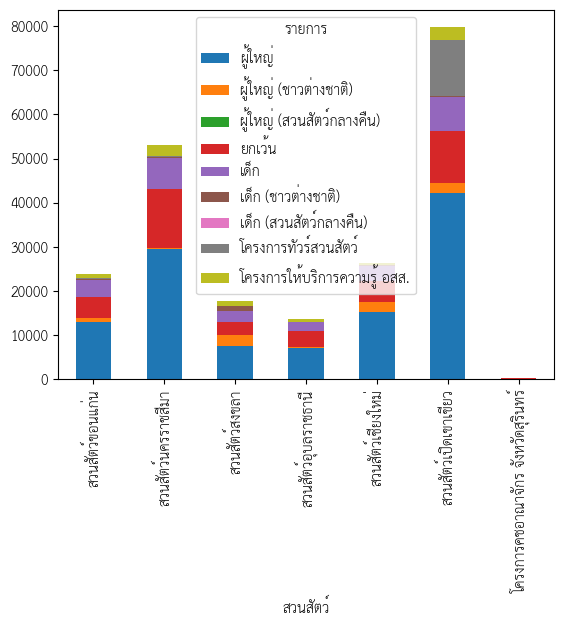

In [115]:
fourth_df = first_df.copy()

# zoo_list = fourth_df['สวนสัตว์'].unique()

# for i in zoo_list:

#   e_zoo = fourth_df[fourth_df['สวนสัตว์'] == i][['รายการ','มิ.ย. 68']]
#   e_zoo.name = i

#   e_zoo['มิ.ย. 68'].plot(kind='pie', labels=e_zoo['รายการ'], autopct='%1.1f%%')
#   plt.title(i)
#   plt.ylabel('')
#   plt.show()
fourth_df_pivot = fourth_df.pivot(index='สวนสัตว์',columns='รายการ',values='มิ.ย. 68')
fourth_df_pivot.plot(kind='bar', stacked=True)